In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv(r'C:\Users\ParsaRz\Desktop\new projects\Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns.str.strip()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:xlabel='Exited', ylabel='count'>

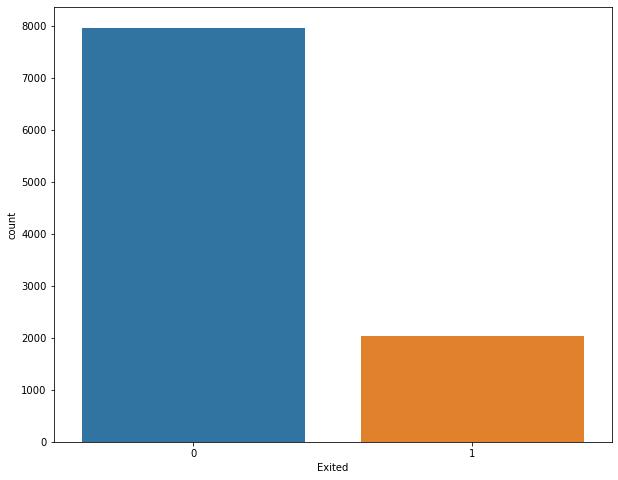

In [10]:
plt.figure(figsize = (10,8))
sns.countplot(data = df , x = 'Exited')

In [11]:
df['Exited'].value_counts().to_frame()

,Exited
0,7963
1,2037


In [12]:
df.drop(['RowNumber', 'CustomerId','Surname'] , axis = 1 , inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
Geographycount = df['Geography'].value_counts().to_frame()
Geographycount

,Geography
France,5014
Germany,2509
Spain,2477


Text(0.5, 1.0, 'Distribution of Geography')

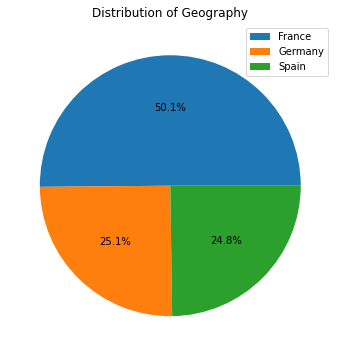

In [15]:
Geography = df['Geography'].value_counts()

plt.figure(figsize = (6,6))
plt.pie(df['Geography'].value_counts() , autopct='%1.1f%%')
plt.legend(Geography.index)
plt.title('Distribution of Geography')

In [16]:
Geography = df.groupby(['Geography','Exited'])['Exited'].count().to_frame().rename(columns={'Exited': 'Count'})
Geography

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [17]:
Geography.reset_index(inplace = True)

In [18]:
Geography

,Geography,Exited,Count
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


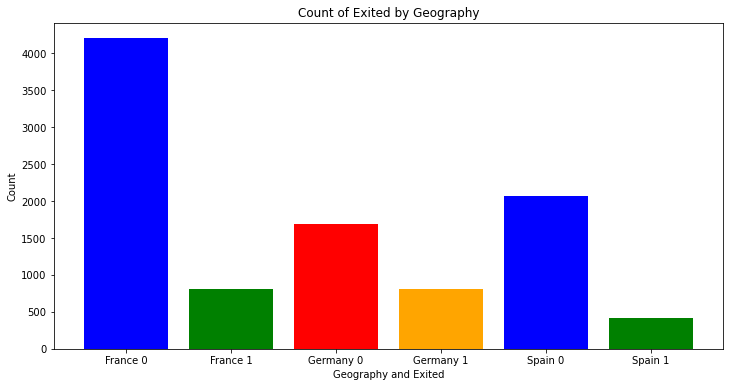

In [19]:
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'orange']
plt.bar(Geography['Geography'] + ' ' + Geography['Exited'].astype(str), Geography['Count'] , color = colors)
plt.xlabel('Geography and Exited')
plt.ylabel('Count')
plt.title('Count of Exited by Geography')
plt.show()

In [20]:
Gendercounts = df.groupby(['Gender' , 'Exited'])['Exited'].count().to_frame().rename(columns={'Exited': 'Count'})
Gendercounts

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [21]:
Gendercounts.reset_index(inplace = True)

In [22]:
Gendercounts

,Gender,Exited,Count
0,Female,0,3404
1,Female,1,1139
2,Male,0,4559
3,Male,1,898


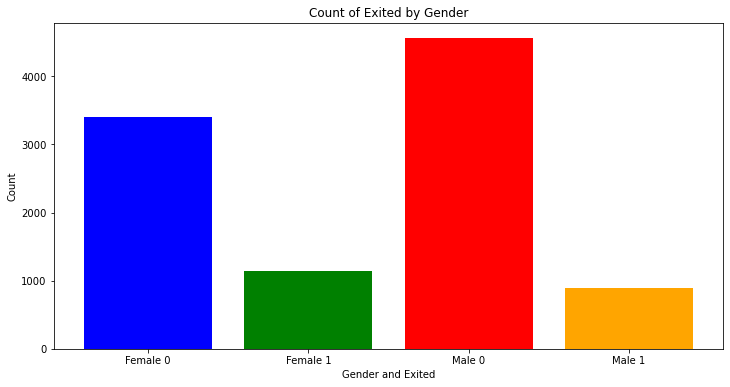

In [23]:
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'orange']
plt.bar(Gendercounts['Gender'] + ' ' + Gendercounts['Exited'].astype(str), Gendercounts['Count'] , color = colors)
plt.xlabel('Gender and Exited')
plt.ylabel('Count')
plt.title('Count of Exited by Gender')
plt.show()

<AxesSubplot:>

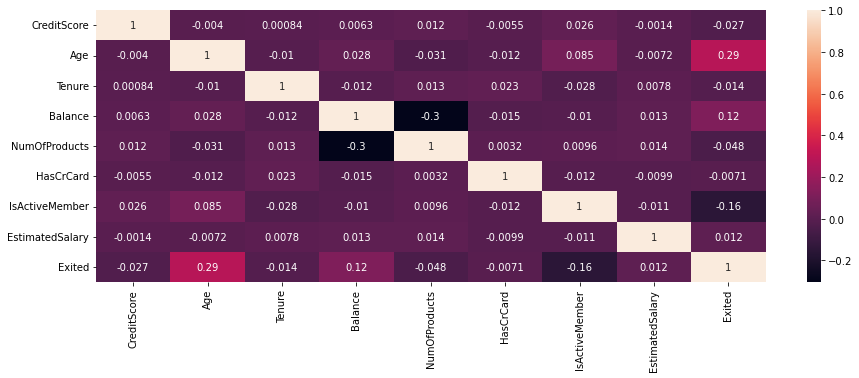

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

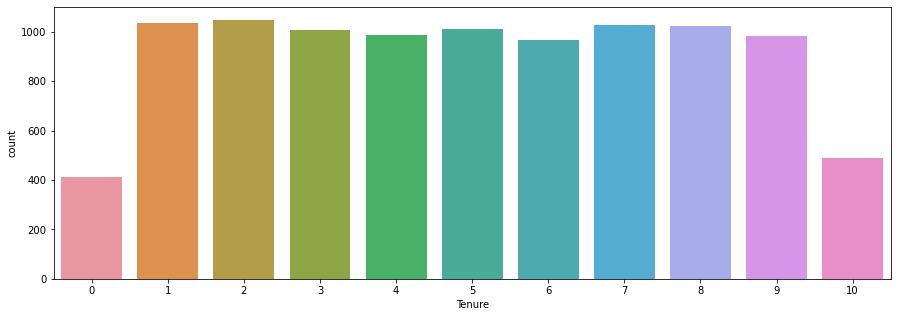

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Tenure', data = df)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

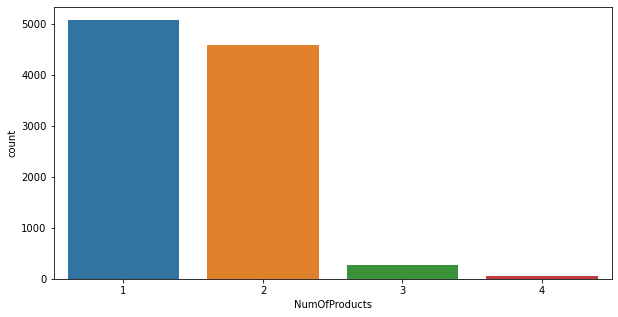

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'NumOfProducts', data = df)

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

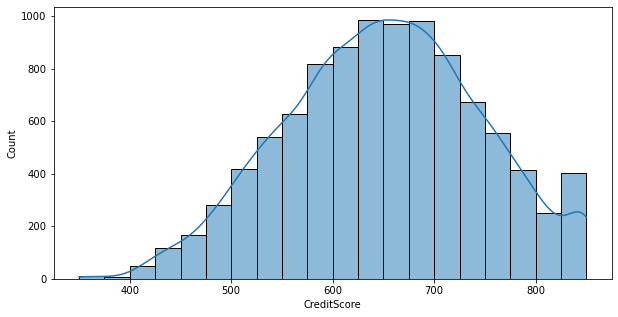

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df['CreditScore'],bins = 20 ,  kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

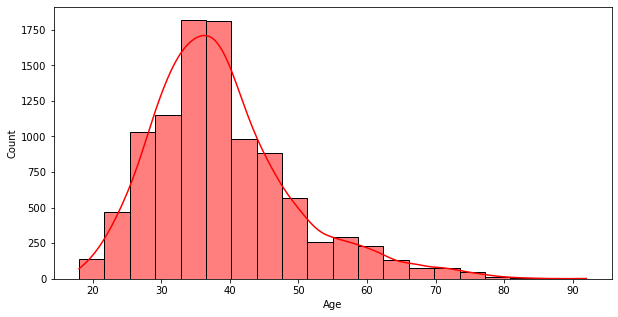

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],bins = 20 ,  kde = True , color='red')

In [29]:
categoricalcolumns = df.select_dtypes(include='object')

encoder = LabelEncoder()
for cols in categoricalcolumns:
    df[cols] = encoder.fit_transform(df[cols])

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [31]:
scaler = MinMaxScaler()

In [32]:
dt = scaler.fit_transform(df)

In [33]:
dfnew = pd.DataFrame(dt , columns=df.columns)

In [34]:
dfnew.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


In [35]:
x = dfnew.drop('Exited' , axis = 1)
y = dfnew['Exited']

In [36]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [37]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [38]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2 , random_state= 0)

In [39]:
xtrain.shape

(8000, 10)

In [40]:
xtest.shape

(2000, 10)

In [41]:
ytrain.shape

(8000,)

In [42]:
ytest.shape

(2000,)

In [43]:
model = LogisticRegression()

In [44]:
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8075


In [45]:
ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

training_accuracy = accuracy_score(ytrain, ytrain_pred)
testing_accuracy = accuracy_score(ytest, ytest_pred)

print(training_accuracy)
print(testing_accuracy)

0.80925
0.8075


In [46]:
k = 5  
cv = KFold(n_splits=k, shuffle=True, random_state=42)

model = LogisticRegression()
scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')

In [47]:
mean_accuracy = np.mean(scores)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.8088000000000001


In [48]:
print(confusion_matrix(ytest, ypred))

[[1549   46]
 [ 339   66]]


In [49]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      1595
         1.0       0.59      0.16      0.26       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.57      2000
weighted avg       0.77      0.81      0.76      2000



In [50]:
RF = RandomForestClassifier(n_estimators=100 , random_state=42)
RF.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = RF.predict(xtest)

In [52]:
print(confusion_matrix(ytest, y_pred))

[[1528   67]
 [ 204  201]]


In [53]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1595
         1.0       0.75      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [54]:
k = 5  
cv = KFold(n_splits=k, shuffle=True, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)  

scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')

mean_accuracy = np.mean(scores)
print("Random Forest - Mean Accuracy:", mean_accuracy)

Random Forest - Mean Accuracy: 0.8630000000000001


In [55]:
SV = SVC(random_state=42)
SV.fit(xtrain, ytrain)

y_pred_SV = SV.predict(xtest)

In [56]:
print(confusion_matrix(ytest, y_pred_SV))

[[1574   21]
 [ 260  145]]


In [57]:
print(classification_report(ytest, y_pred_SV))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1595
         1.0       0.87      0.36      0.51       405

    accuracy                           0.86      2000
   macro avg       0.87      0.67      0.71      2000
weighted avg       0.86      0.86      0.83      2000



In [58]:
k = 5  
cv = KFold(n_splits=k, shuffle=True, random_state=42)

model = SVC(random_state=42)  

scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')

In [59]:
mean_accuracy = np.mean(scores)
print("SVC - Mean Accuracy:", mean_accuracy)

SVC - Mean Accuracy: 0.8491
